In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygments.lexers import go
from sklearn.model_selection import train_test_split
%matplotlib inline

In [20]:
dataset=pd.read_csv("Advertising.csv")
X = dataset[['TV', 'Radio', 'Newspaper']]
Y = dataset[['Sales']]
print("X:",X)
print("Y:",Y)
Y.shape


X:         TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
Y:      Sales
0     22.1
1     10.4
2     12.0
3     16.5
4     17.9
..     ...
195    7.6
196   14.0
197   14.8
198   25.5
199   18.4

[200 rows x 1 columns]


(200, 1)

In [3]:
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (160, 4)
Shape of X_test: (40, 4)
Shape of Y_train: (160, 1)
Shape of Y_test: (40, 1)


In [5]:
print(X.shape)
print(Y.shape)
Y = Y.values.reshape(Y.shape[0], 1)
print(Y.shape)

(200, 4)
(200, 1)
(200, 1)


In [6]:
theta = np.random.randn(4, 1)
theta

array([[-0.64742297],
       [-1.0300317 ],
       [ 0.06957071],
       [ 0.88412645]])

In [7]:
def model(X, theta):
    return X.dot(theta)

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [9]:
cost_function(X, Y, theta)

10609.59583076106

In [10]:
def grad(X,Y, theta):
    m = len(Y)
    return 1/m * X.T.dot(model(X, theta) - Y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

##  Phase d’entrainement

In [12]:
print("y shape:", Y.shape)
print("y_train shape:", Y_train.values.shape)
print(Y[:4])
print(Y_train)

Y_train = Y_train.values


y shape: (200, 1)
y_train shape: (160, 1)
[[22.1]
 [10.4]
 [12. ]
 [16.5]]
     Sales
79    11.0
197   14.8
38    10.1
24     9.7
122   16.6
..     ...
106    7.2
14    19.0
92    19.4
179   17.6
102   19.8

[160 rows x 1 columns]


In [13]:
n_iterations = 1000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, Y_train, theta, learning_rate, n_iterations)

In [14]:
predictions = model(X, theta_final)

theta_final

array([[0.05719   ],
       [0.11041772],
       [0.01108556],
       [3.76094069]])

In [15]:


# Create a 3D scatter plot
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=X_train[:,0],
    y=X_train[:,1],
    z=X_train[:,2],
    mode='markers',
    marker=dict(
        size=3,
        color=Y_train,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

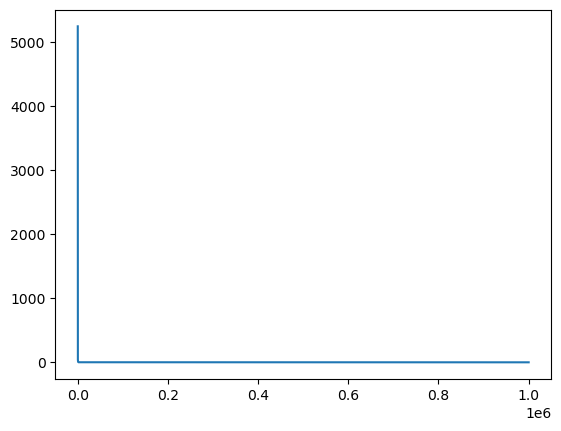

In [16]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [18]:
coef_determination(Y, predictions)

0.897875690519503